In [2]:
import                      os
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import tensorflow        as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics         import mean_squared_error



In [3]:
def fn_plot_tf_hist(hist_df : pd.DataFrame):
    '''
    Note this function is specifically designed to plot Tensorflow training output
    Args:
      hist_df : pandas DataFrame with four columns
                For 'x' values, we will use index
                first column is accuracy
                Second column is loss
                third column is val_accuracy
                fourth column is val_loss
    '''
    fig, axes = plt.subplots(1,2 , figsize = (15,6)) # instantiate plot

    # properties  matplotlib.patch.Patch 
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)
    facecolor = 'cyan'
    fontsize=12
    
    # Get columns by index to eliminate any column naming error
    y1 = hist_df.columns[0]
    y2 = hist_df.columns[1]
    y3 = hist_df.columns[2]
    y4 = hist_df.columns[3]

    # Where was min loss
    best = hist_df[hist_df[y4] == hist_df[y4].min()]
 
    ax = axes[0]

    hist_df.plot(y = [y2,y4], ax = ax, colormap=CMAP)


    # little beautification
    txtFmt = "Loss: \n  train: {:6.4f}\n   test: {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y2],
                           hist_df.iloc[-1][y4]) #text to plot
    
    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy()-1, best[y4].to_numpy()[0]), # location of text 
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y2.capitalize())
    ax.set_title('Errors')
    ax.legend(loc = 'upper left') # model legend to upper left

    ax = axes[1]

    hist_df.plot( y = [y1, y3], ax = ax, colormap=CMAP)
    
    # little beautification
    txtFmt = "Accuracy: \n  train: {:6.4f}\n  test:  {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y3]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y3].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y3].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy()-1, best[y3].to_numpy()[0]), # location of text 
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow
    
    
    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y1.capitalize())
    ax.legend(loc = 'lower left')
    
    plt.tight_layout()

In [4]:
altName = 'all_in'

RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production
BATCH_SIZE   = 64 # batch size for training   
TRAIN_SIZE   = BATCH_SIZE * 9
WEIGHT_DECAY = 0.001

EPOCHS      = 100 # number of cycles to run
ALPHA       = 0.001 # learning rate
PATIENCE    = 20
LR_PATIENCE = 10
LR_FACTOR   = 0.1

# Set parameters for decoration of plots
params = {'legend.fontsize' : 'large',
          'figure.figsize'  : (9,9),
          'axes.labelsize'  : 'x-large',
          'axes.titlesize'  :'x-large',
          'xtick.labelsize' :'large',
          'ytick.labelsize' :'large',
         }

plt.rcParams.update(params) # update rcParams
CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [5]:
start = -2.1
end   = 2.1
delta = 0.0005

X_train = np.arange(start, end + delta, delta)
y_rnd   = np.random.rand(X_train.shape[0]) - 0.5
y_true  = 2 * np.square(X_train) + 2 * np.sin(np.pi * X_train)
y_train = y_true + y_rnd * 2

X_test      = np.arange(start, end + delta, delta * 10)
y_rnd       = np.random.rand(X_test.shape[0]) - 0.5
y_true_test = 2 * np.square(X_test) + 2 * np.sin(np.pi * X_test)
y_test = y_true_test + y_rnd * 2

In [6]:
num_examples = BATCH_SIZE * 131

X_train = X_train[:num_examples]
y_train = y_train[:num_examples]
y_true  = y_true[:num_examples]

In [7]:
X_train.max(), X_test.min()

(2.0915000000013992, -2.1)

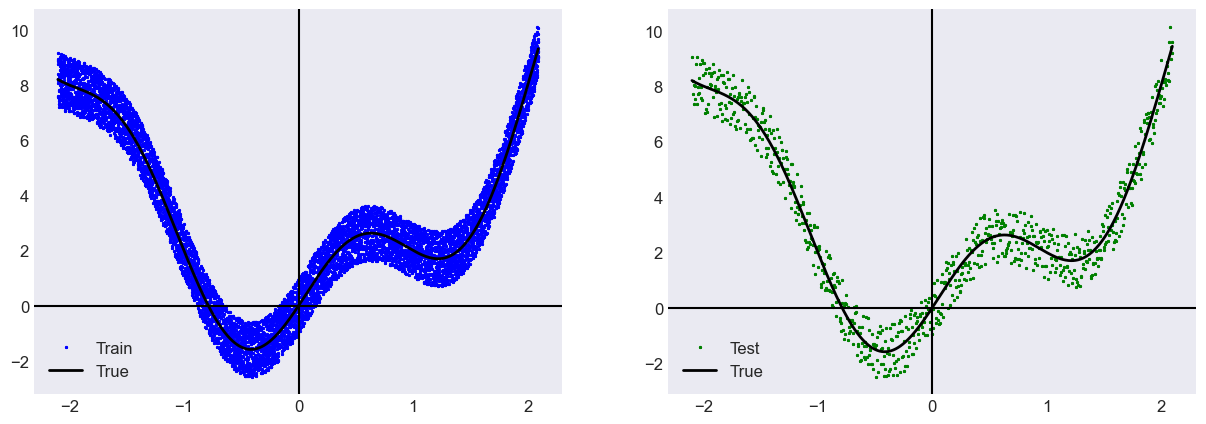

In [8]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

ax = axes[0]
ax.plot(X_train, y_train, 'b*', markersize = 2, label = 'Train')
ax.plot(X_train, y_true, c = 'k', linewidth = 2, label = 'True')
ax.axhline(0, c = 'k')
ax.axvline(0, c = 'k')
ax.grid()
ax.legend()

ax = axes[1]
ax.plot(X_test, y_test, 'g*', markersize = 2, label = 'Test')
ax.plot(X_test, y_true_test, c = 'k', linewidth = 2, label = 'True')
ax.axhline(0, c = 'k')
ax.axvline(0, c = 'k')
ax.grid()
ax.legend()



In [20]:
#what shape of input layer?
num_features = 1

#initializer = tf.keras.initializers.HeNormal(seed = Random_state)

input_layer = tf.keras.layers.Input(shape=(num_features,))

hidden_layer = tf.keras.layers.Dense(128, activation='relu')(input_layer)

hidden_layer = tf. keras.layers.Dense(64, activation='relu')(hidden_layer)


output_layer = tf.keras.layers.Dense(1)(hidden_layer)

model = tf.keras.Model(inputs = input_layer, outputs = output_layer)

In [26]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer = 'adam',
             loss = 'mean_squared_error',
             metrics = ['mae'])

In [30]:
history = model.fit(X_train, y_train,
                   batch_size      = BATCH_SIZE,
                   validation_data = [X_test, y_test],
                   epochs          = EPOCHS,
                   verbose         = 2)

Epoch 1/100
131/131 - 1s - 9ms/step - loss: 6.8036 - mae: 2.0042 - val_loss: 3.0665 - val_mae: 1.4483
Epoch 2/100
131/131 - 0s - 885us/step - loss: 2.2480 - mae: 1.2200 - val_loss: 1.6998 - val_mae: 1.0619
Epoch 3/100
131/131 - 0s - 870us/step - loss: 1.4832 - mae: 0.9800 - val_loss: 1.3646 - val_mae: 0.9194
Epoch 4/100
131/131 - 0s - 863us/step - loss: 1.2946 - mae: 0.8896 - val_loss: 1.2433 - val_mae: 0.8605
Epoch 5/100
131/131 - 0s - 863us/step - loss: 1.1996 - mae: 0.8484 - val_loss: 1.1763 - val_mae: 0.8347
Epoch 6/100
131/131 - 0s - 847us/step - loss: 1.1308 - mae: 0.8245 - val_loss: 1.0885 - val_mae: 0.8067
Epoch 7/100
131/131 - 0s - 877us/step - loss: 1.0459 - mae: 0.7995 - val_loss: 1.0099 - val_mae: 0.7821
Epoch 8/100
131/131 - 0s - 840us/step - loss: 0.9465 - mae: 0.7675 - val_loss: 0.8825 - val_mae: 0.7411
Epoch 9/100
131/131 - 0s - 863us/step - loss: 0.8327 - mae: 0.7284 - val_loss: 0.7703 - val_mae: 0.7015
Epoch 10/100
131/131 - 0s - 840us/step - loss: 0.7228 - mae: 0.684

In [38]:
loss_df = pd.DataFrame(history.history)
loss_df.head()

,loss,mae,val_loss,val_mae
0,6.803636,2.004210,3.066499,1.448311
1,2.248033,1.219999,1.699765,1.061908
2,1.483159,0.980007,1.364590,0.919355
3,1.294610,0.889588,1.243260,0.860485
4,1.199646,0.848352,1.176344,0.834679


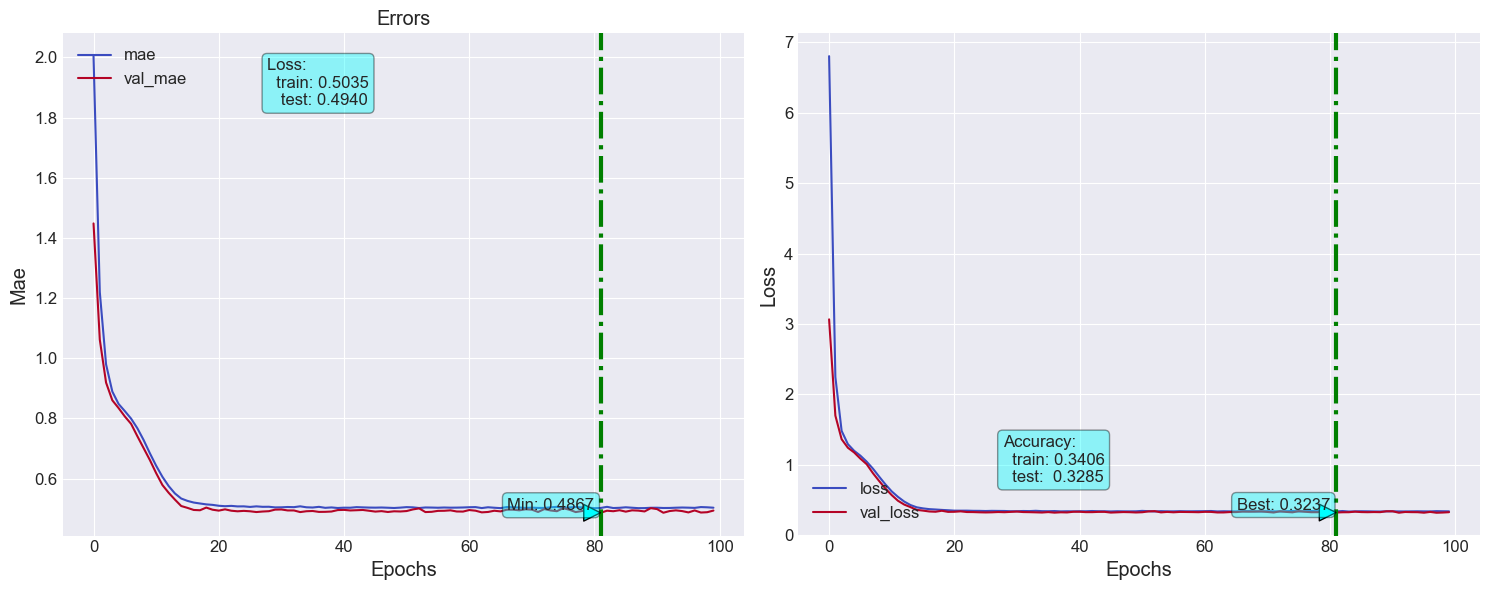

In [40]:
fn_plot_tf_hist(loss_df)

In [42]:
y_pred = model.predict(X_test)

results_df = pd.DataFrame({'pred' : y_pred[:,0], 'test' : y_test})

results_df['y_true'] = y_true_test

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


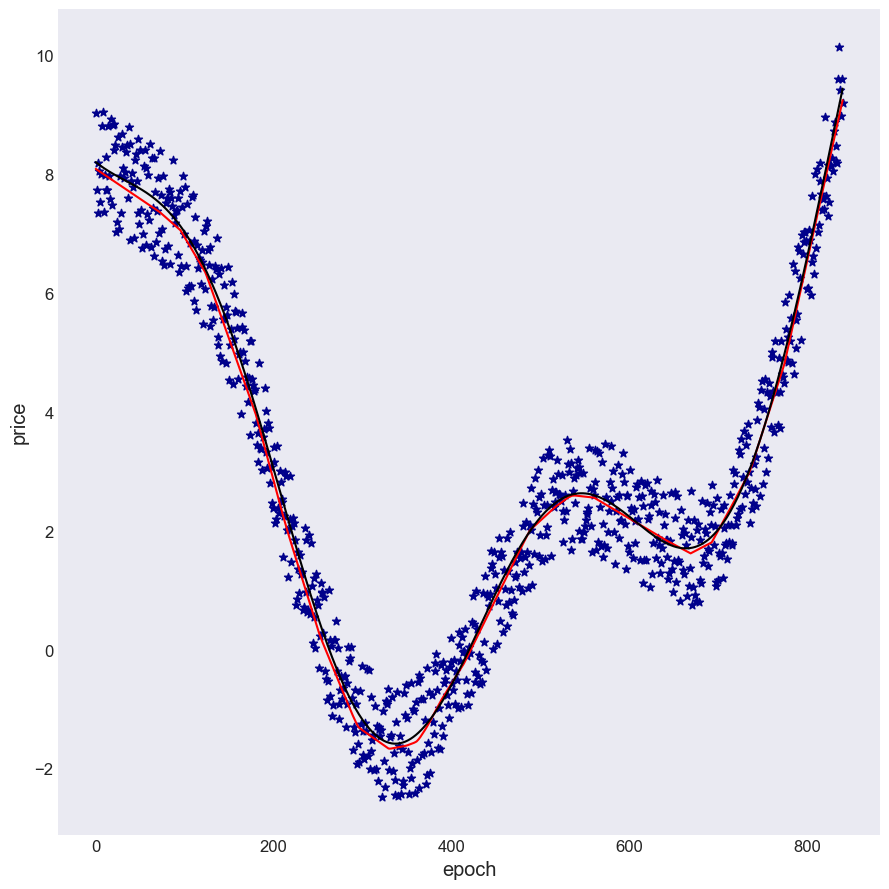

In [50]:
ax = results_df.pred.plot(c = 'r', label = 'pred');
results_df.y_true.plot(c = 'k', ax = ax, label = 'true')

plt.scatter(results_df.index, results_df.test, c = 'DarkBlue', marker = '*', label = 'test');
ax.set_xlabel('epoch')
ax.set_ylabel('price')
plt.tight_layout()
plt.grid()